<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/FIN_Y_FTC_Casa_de_Bolsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

Saving Valor de la Unidad.xlsx to Valor de la Unidad.xlsx


In [3]:
FIN = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FIN")

In [4]:
FTC = pd.read_excel("/content/Valor de la Unidad.xlsx", sheet_name="FTC")

In [5]:
FIN['Fecha'] = pd.to_datetime(FIN['Fecha'])
FTC['Fecha'] = pd.to_datetime(FTC['Fecha'])

In [6]:
FIN.set_index('Fecha', inplace=True)
FTC.set_index('Fecha', inplace=True)

In [7]:
FIN.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,4.075393e+07,1000.00,40753.93,0.00,0.00,0,0,0,0.00,0.00,0.0,1,40753930,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,2.081243e+10,988.22,21060439.60,-479922.23,390.11,0,0,0,-0.99,-0.99,0.0,1,0,2.077216e+10,0.0,0,0,0,0,0
2023-04-29,2.082169e+10,988.66,21060439.60,9256151.44,199223.76,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,2.083098e+10,989.10,21060439.60,9298926.12,199312.36,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,2.084028e+10,989.55,21060439.60,9297320.57,199401.38,0,0,0,0.18,0.18,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


In [8]:
FTC.head()

,Valor Fondo,Valor Unidad,Unidades en Circulación,Rendimientos,Comisión Fija,Comisión Exito,Retención,Factor Retenc.,Rentab Diaria,Rentab Bruta,Rent Mes Eje Izq,Suscrip tores,Total Aperturas,Total Adiciones,Total Retiros,Imp. Retiros,Total Cancel,Imp. Cancel,Total NC,Total ND
Fecha,,,,,,,,,,,,,,,,,,,,
2023-04-27,2.833568e+07,1000.00,28335.69,0.00,0.00,0,0,0,0.00,0.00,0.0,1,28335685,0.000000e+00,0.0,0,0,0,0,0
2023-04-28,1.403352e+10,988.22,14200745.04,-333683.78,271.24,0,0,0,-0.99,-0.99,0.0,1,0,1.400551e+10,0.0,0,0,0,0,0
2023-04-29,1.403921e+10,988.62,14200745.04,5690237.51,134333.66,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-04-30,1.404491e+10,989.03,14200745.04,5703307.11,134388.12,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0
2023-05-01,1.405061e+10,989.43,14200745.04,5698349.59,134442.72,0,0,0,0.16,0.16,0.0,1,0,0.000000e+00,0.0,0,0,0,0,0


Text(0.5, 0, 'Fecha')

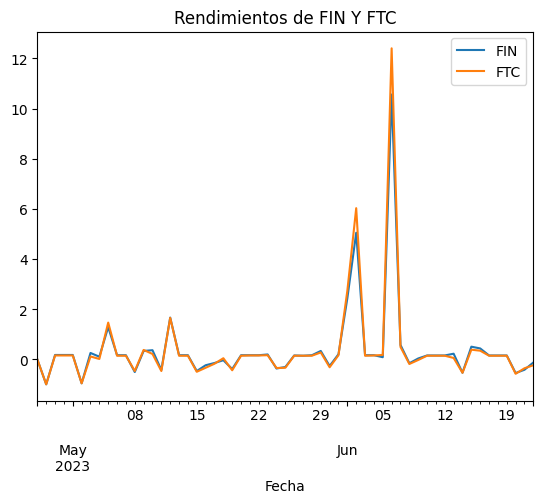

In [9]:
FIN['Rentab Diaria'].plot()
FTC['Rentab Diaria'].plot()
plt.title('Rendimientos de FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')  # Rango de fechas mensuales
plt.legend(['FIN',"FTC"])
plt.xlabel('Fecha')

In [10]:
descripcion_RENDIMIENTOSFIN = FIN['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFIN

count    57.000000
mean      0.376667
std       1.609743
min      -0.990000
25%      -0.140000
50%       0.160000
75%       0.200000
max      10.560000
Name: Rentab Diaria, dtype: float64

In [11]:
descripcion_RENDIMIENTOSFTC = FTC['Rentab Diaria'].describe()
descripcion_RENDIMIENTOSFTC

count    57.000000
mean      0.408070
std       1.882506
min      -0.990000
25%      -0.180000
50%       0.150000
75%       0.160000
max      12.400000
Name: Rentab Diaria, dtype: float64

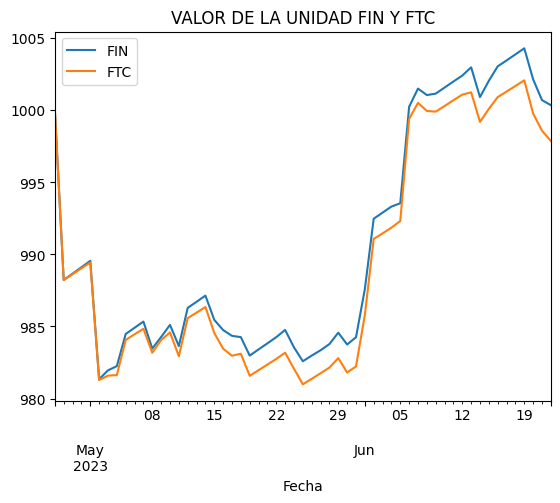

In [12]:
FIN["Valor Unidad"].plot()
FTC["Valor Unidad"].plot()
plt.title('VALOR DE LA UNIDAD FIN Y FTC')
resampled_dates = pd.date_range(start=FIN.index.min(), end=FIN.index.max(), freq='M')
plt.legend(['FIN',"FTC"])

In [13]:
descripcion_VUFIN = FIN['Valor Unidad'].describe()
descripcion_VUFIN

count      57.000000
mean      990.747544
std         8.087007
min       981.340000
25%       984.250000
50%       986.710000
75%      1000.690000
max      1004.280000
Name: Valor Unidad, dtype: float64

In [14]:
descripcion_VUFTC = FTC['Valor Unidad'].describe()
descripcion_VUFTC

count      57.000000
mean      989.539825
std         7.837743
min       980.990000
25%       982.810000
50%       985.790000
75%       999.390000
max      1002.060000
Name: Valor Unidad, dtype: float64

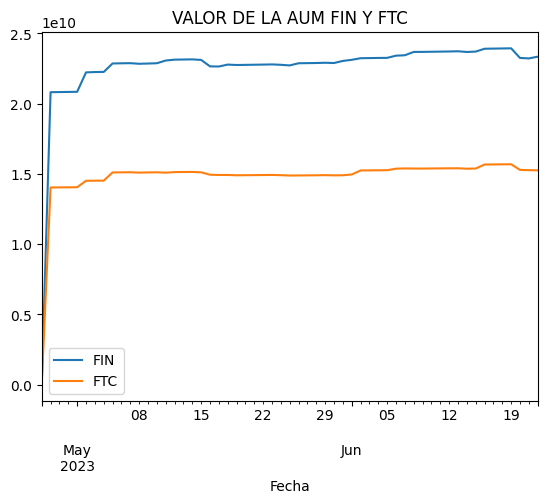

In [15]:
FIN['Valor Fondo'].plot()
FTC['Valor Fondo'].plot()
plt.title('VALOR DE LA AUM FIN Y FTC')
plt.legend(['FIN',"FTC"])

In [16]:
FIN['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-18    23,923,737,523,49
2023-06-19    23,933,687,378,94
2023-06-20    23,248,815,335,17
2023-06-21    23,215,548,793,27
2023-06-22    23,339,611,416,23
Name: Valor Fondo, dtype: object

In [17]:
FTC['Valor Fondo'].apply(lambda x: "{:,.2f}".format(x).replace(",", ".").replace(".", ",")).tail()

Fecha
2023-06-18    15,679,028,475,92
2023-06-19    15,685,089,020,06
2023-06-20    15,282,092,767,89
2023-06-21    15,263,953,055,31
2023-06-22    15,253,088,729,62
Name: Valor Fondo, dtype: object

In [18]:
nivel_confianza = 0.95

In [19]:
FIN['Valor Unidad'].head()

Fecha
2023-04-27    1000.00
2023-04-28     988.22
2023-04-29     988.66
2023-04-30     989.10
2023-05-01     989.55
Name: Valor Unidad, dtype: float64

In [20]:
FIN['Rentab Diaria'].head()

Fecha
2023-04-27    0.00
2023-04-28   -0.99
2023-04-29    0.18
2023-04-30    0.18
2023-05-01    0.18
Name: Rentab Diaria, dtype: float64

In [21]:
Retorno_FTC = FTC['Valor Fondo']*FTC['Rentab Diaria']
Retorno_FTC.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -1.389318e+10
2023-04-29    2.246273e+09
2023-04-30    2.247185e+09
2023-05-01    2.248097e+09
dtype: float64

In [22]:
Retorno_FIN = FIN['Valor Fondo']*FIN['Rentab Diaria']
Retorno_FIN.head()

Fecha
2023-04-27    0.000000e+00
2023-04-28   -2.060431e+10
2023-04-29    3.747903e+09
2023-04-30    3.749577e+09
2023-05-01    3.751251e+09
dtype: float64

In [39]:
var_FTC = np.percentile(Retorno_FTC, (1 - nivel_confianza) * 100)

In [ ]:
historico_var_FTC = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FTC, p)
    historico_var_FTC.append(percentil)
print(historico_var_FTC)

In [43]:
var_FIN = np.percentile(Retorno_FIN, (1 - nivel_confianza) * 100)

In [ ]:
historico_var_FIN = []
for p in range(1, 101):
    percentil = np.percentile(Retorno_FIN, p)
    historico_var_FIN.append(percentil)
print(historico_var_FIN)

# **VaR FTC**

In [37]:
var_formatted = "{:,.2f}".format(var_FTC).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -8.258.128.522,95


# **VaR FIN**

In [38]:
var_formatted = "{:,.2f}".format(var_FIN).replace(",", "temp").replace(".", ",").replace("temp", ".")
print("El VaR al {}% de confianza es: {}".format(nivel_confianza * 100, var_formatted))

El VaR al 95.0% de confianza es: -12.548.744.024,64


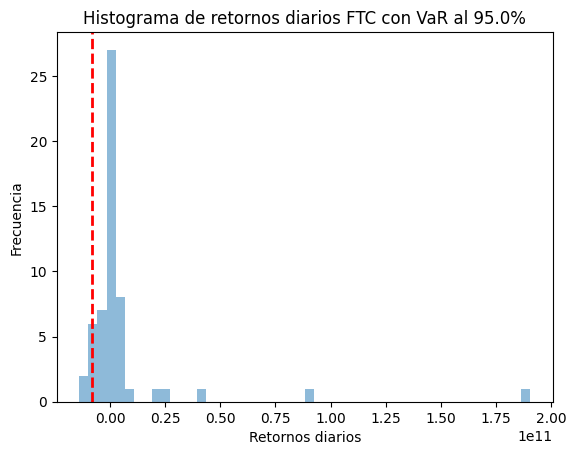

In [ ]:
plt.hist(Retorno_FTC , bins=50, alpha=0.5)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-28-c9d723731fc9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FTC, shade=True)


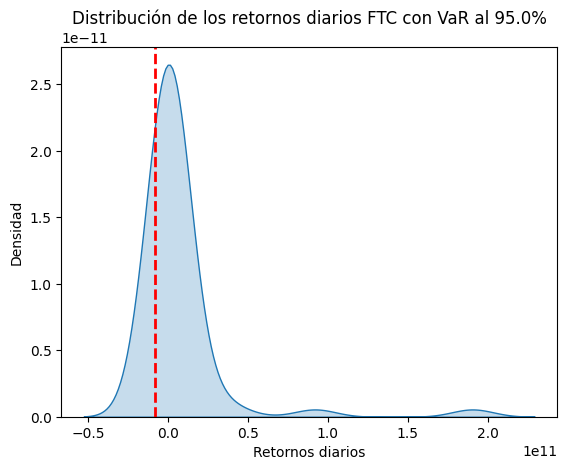

In [ ]:
sns.kdeplot(Retorno_FTC, shade=True)
plt.axvline(x=var_FTC, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FTC con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

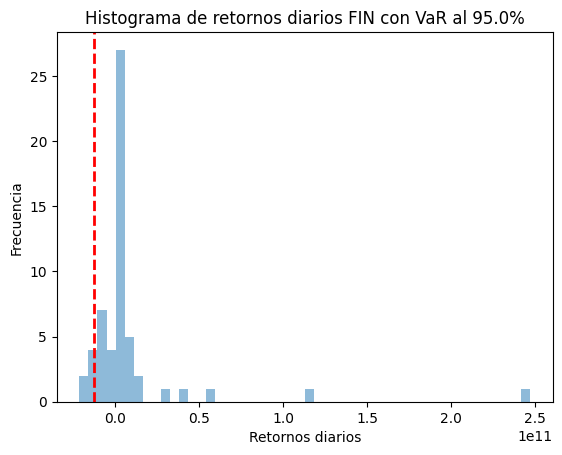

In [ ]:
plt.hist(Retorno_FIN , bins=50, alpha=0.5)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Frecuencia')
plt.title('Histograma de retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))

plt.show()

<ipython-input-30-f91fb862fd29>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Retorno_FIN, shade=True)


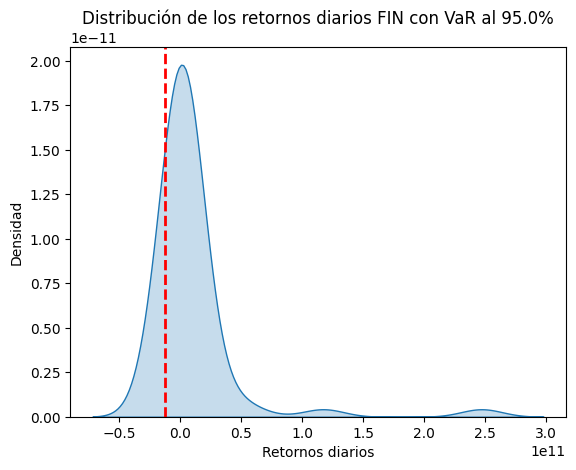

In [ ]:
sns.kdeplot(Retorno_FIN, shade=True)
plt.axvline(x=var_FIN, color='r', linestyle='--', linewidth=2)
plt.xlabel('Retornos diarios')
plt.ylabel('Densidad')
plt.title('Distribución de los retornos diarios FIN con VaR al {}%'.format(nivel_confianza * 100))
plt.show()

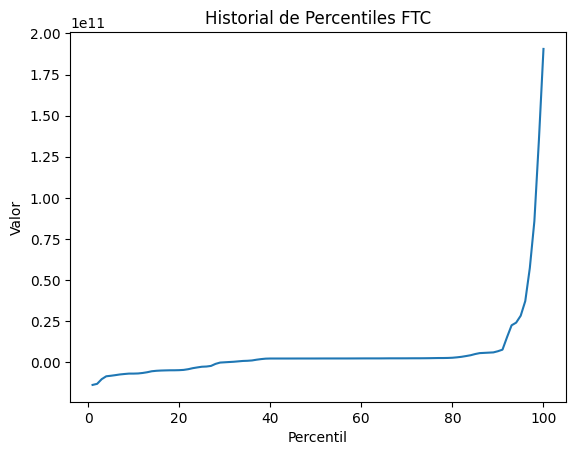

In [49]:
x = np.arange(1, 101)
plt.plot(x, historico_var_FTC)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles FTC')
plt.show()

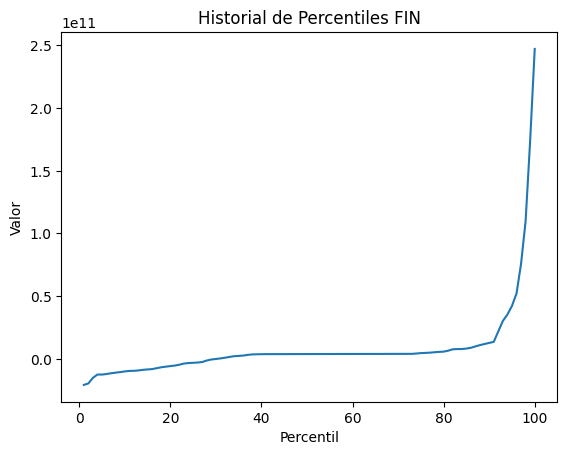

In [48]:
x = np.arange(1, 101)
plt.plot(x, historico_var_FIN)
plt.xlabel('Percentil')
plt.ylabel('Valor')
plt.title('Historial de Percentiles FIN')
plt.show()